In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
data = pd.read_csv( "mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Dealing with binary classes

In [16]:
data["class"] = data["class"].apply(lambda x: 0 if x == 'e' else 1)

In [17]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### calculate the classes for all features

In [18]:
colnames = data.columns

In [28]:
for i in range(len(colnames)):
    print("Features name is:", colnames[i])
    print(data[colnames[i]].value_counts())
    print("-----------------------------------------------")

Features name is: class
0    4208
1    3916
Name: class, dtype: int64
-----------------------------------------------
Features name is: cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
-----------------------------------------------
Features name is: cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
-----------------------------------------------
Features name is: cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
-----------------------------------------------
Features name is: bruises
f    4748
t    3376
Name: bruises, dtype: int64
-----------------------------------------------
Features name is: odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
-----------------------------------------------
Features name is: gill-attachment
f    7914
a     21

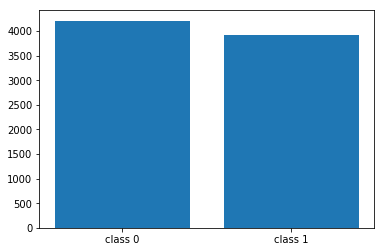

In [33]:
import string
plt.figure()
x_names = ['class {}'.format(xx) for xx in string.digits[:2]]
# put label as the first argument, values as the second argument
plt.bar(x_names, data["class"].value_counts())
plt.show()

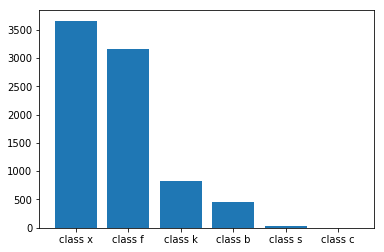

In [51]:
names = []
for name, val in data[colnames[1]].value_counts().items():
    names.append(name)
plt.figure()
x_names = ['class {}'.format(xx) for xx in names]
# put label as the first argument, values as the second argument
plt.bar(x_names, data[colnames[1]].value_counts())
plt.show()

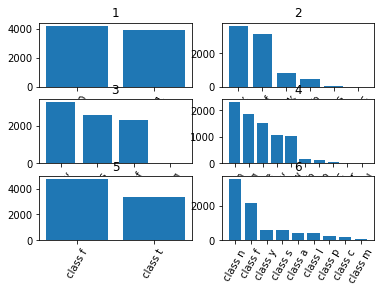

In [63]:
plt.figure()
ii = 0
for i in range(3):
    for j in range(2):
        plt.subplot(3,2,ii+1)
        plt.title(ii+1)
        ii = ii+1
        names = []
        for name, val in data[colnames[ii-1]].value_counts().items():
            names.append(name)
        x_names = ['class {}'.format(xx) for xx in names]
        plt.bar(x_names, data[colnames[ii-1]].value_counts())
        plt.xticks(rotation = 60)

plt.show()

In [66]:
pd.crosstab(data["class"], data[colnames[1]])

cap-shape,b,c,f,k,s,x
class,,,,,,
0,404,0,1596,228,32,1948
1,48,4,1556,600,0,1708


In [73]:
data[colnames[1]].value_counts(normalize=True)

x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap-shape, dtype: float64

### adding "missing"

In [83]:
# 每一列如果有null，就在丢失的地方用"missing"代替
cols = colnames[1:]
for col in cols:
    if np.any(data[col].isnull()):
        data.loc[data[col].isnull(), col] = 'missing'

In [85]:
labelEncoders = dict()
# 对每一列进行one hot encoding
for col in cols:
    encoder = LabelEncoder()  # 这是sklearn里的
    values = data[col].tolist()
    values.append('missing')  #加入missing这种值
    encoder.fit(values)
    labelEncoders[col] = encoder
    print("encoder classes", encoder.classes_)

encoder classes ['b' 'c' 'f' 'k' 'missing' 's' 'x']
encoder classes ['f' 'g' 'missing' 's' 'y']
encoder classes ['b' 'c' 'e' 'g' 'missing' 'n' 'p' 'r' 'u' 'w' 'y']
encoder classes ['f' 'missing' 't']
encoder classes ['a' 'c' 'f' 'l' 'm' 'missing' 'n' 'p' 's' 'y']
encoder classes ['a' 'f' 'missing']
encoder classes ['c' 'missing' 'w']
encoder classes ['b' 'missing' 'n']
encoder classes ['b' 'e' 'g' 'h' 'k' 'missing' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
encoder classes ['e' 'missing' 't']
encoder classes ['?' 'b' 'c' 'e' 'missing' 'r']
encoder classes ['f' 'k' 'missing' 's' 'y']
encoder classes ['f' 'k' 'missing' 's' 'y']
encoder classes ['b' 'c' 'e' 'g' 'missing' 'n' 'o' 'p' 'w' 'y']
encoder classes ['b' 'c' 'e' 'g' 'missing' 'n' 'o' 'p' 'w' 'y']
encoder classes ['missing' 'p']
encoder classes ['missing' 'n' 'o' 'w' 'y']
encoder classes ['missing' 'n' 'o' 't']
encoder classes ['e' 'f' 'l' 'missing' 'n' 'p']
encoder classes ['b' 'h' 'k' 'missing' 'n' 'o' 'r' 'u' 'w' 'y']
encoder classes ['a' 'c'

In [86]:
# The number of columns after one hot encoding
dimensionality = 0
for col, encoder in labelEncoders.items():
    dimensionality += len(encoder.classes_)
print("dimensionality:  %d" % (dimensionality))

dimensionality:  139


### Transforming data

In [89]:
# 用于测试数据的变换
def transform(df):
    N, _ = df.shape
    X = np.zeros((N, dimensionality))
    i = 0
    for col ,encoder in labelEncoders.items():
        k = len(encoder.classes_)
        X[np.arange(N), encoder.transform(df[col]) + i] = 1
        i += k  # 下一列从 i+k 开始
    return X

In [93]:
X = transform(data)
Y = data["class"].as_matrix()

C:\Users\46541\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### models:

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [103]:
logistic_model = LogisticRegression()
print("logistic regression performance: %f" % (cross_val_score(logistic_model, X, Y, cv=5)).mean())

logistic regression performance: 0.919719


In [105]:
forest = RandomForestClassifier(n_estimators=20)
print("Random Forest performance: %f" % (cross_val_score(forest, X, Y, cv=5).mean()))

Random Forest performance: 0.923191
